In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize

In [ ]:
'''
DATA SCRAPING CODE TAKEN FROM https://github.com/scrapehero-code/amazon-review-scraper
SENTIMENT ANALYSIS USING NLTK MODIFIED FROM https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook
'''

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('/content/data.csv')
print(df.shape)

(50, 10)


In [5]:
df.head()


,title,content,date,variant,images,verified,author,rating,product,url
0,Great,Bought these for my daughter and she loves the...,26 Aug 2022,Special Size: Toddler (1-4 Years) Size: 9.5 To...,NaN,Yes,southern twang,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
1,Cute and comfy!,My daughter loves these shoes! The colors are ...,16 Aug 2022,Special Size: Little Kid (4-8 Years) Size: 3 L...,NaN,Yes,KBen,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
2,Hermosos,"Son tal cual aparecen en la foto, muy cómodos,...",23 Aug 2022,Special Size: Little Kid (4-8 Years) Size: 12 ...,NaN,Yes,Tania Alvarado,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
3,Shoes are great,Easy stretch to fit ! Perfect for infants,19 Aug 2022,Special Size: Infant (0-12 Months) Size: 3 Wid...,NaN,Yes,David Connor,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
4,Adorable,For granddaughter starting kindergarten . Hav...,08 Aug 2022,Special Size: Little Kid (4-8 Years) Size: 13....,NaN,Yes,Dorothy,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...


USING VADER MODEL FOR SENTIMENT ANALYSIS

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()  #its a sentiment analyzer object

In [8]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content']

    myid = row['date']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
res

{'26 Aug 2022': {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.296},
 '16 Aug 2022': {'neg': 0.059, 'neu': 0.689, 'pos': 0.252, 'compound': 0.8439},
 '23 Aug 2022': {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182},
 '19 Aug 2022': {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8553},
 '08 Aug 2022': {'neg': 0.128, 'neu': 0.64, 'pos': 0.232, 'compound': 0.4199},
 '05 Aug 2022': {'neg': 0.0, 'neu': 0.512, 'pos': 0.488, 'compound': 0.8879},
 '30 Jun 2022': {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.552},
 '16 Jun 2022': {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.9296},
 '15 Jun 2022': {'neg': 0.082, 'neu': 0.604, 'pos': 0.314, 'compound': 0.8276},
 '07 May 2022': {'neg': 0.07, 'neu': 0.621, 'pos': 0.309, 'compound': 0.9214},
 '09 Apr 2022': {'neg': 0.087,
  'neu': 0.794,
  'pos': 0.118,
  'compound': -0.1243},
 '15 Mar 2022': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 '08 Mar 2022': {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 

In [10]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'date'})
vaders = vaders.merge(df, how='left')

vaders.head()

,date,neg,neu,pos,compound,title,content,variant,images,verified,author,rating,product,url
0,26 Aug 2022,0.115,0.885,0.000,-0.2960,Great,Bought these for my daughter and she loves the...,Special Size: Toddler (1-4 Years) Size: 9.5 To...,NaN,Yes,southern twang,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
1,26 Aug 2022,0.115,0.885,0.000,-0.2960,Looked good,Shoes slip off my child's feet. He can't even ...,Special Size: Toddler (1-4 Years) Size: 5.5 Wi...,NaN,Yes,Talisa Shelanskey,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
2,16 Aug 2022,0.059,0.689,0.252,0.8439,Cute and comfy!,My daughter loves these shoes! The colors are ...,Special Size: Little Kid (4-8 Years) Size: 3 L...,NaN,Yes,KBen,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
3,23 Aug 2022,0.000,0.813,0.187,0.3182,Hermosos,"Son tal cual aparecen en la foto, muy cómodos,...",Special Size: Little Kid (4-8 Years) Size: 12 ...,NaN,Yes,Tania Alvarado,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
4,19 Aug 2022,0.000,0.299,0.701,0.8553,Shoes are great,Easy stretch to fit ! Perfect for infants,Special Size: Infant (0-12 Months) Size: 3 Wid...,NaN,Yes,David Connor,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...


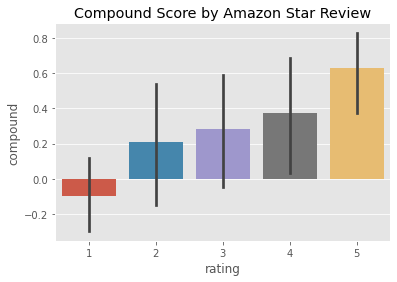

In [11]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

We can see that more the 5-star review, it gets a higher compund score

In [12]:
vaders.sort_values(by=['compound']) 

,date,neg,neu,pos,compound,title,content,variant,images,verified,author,rating,product,url
36,29 Oct 2021,0.170,0.830,0.000,-0.7620,Only Lasted 1 Month - Laces Failed and Toe Bro...,After just 6 weeks of wearing these shoes ~5 d...,NaN,NaN,Yes,Amazon Customer,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
24,12 Mar 2022,0.142,0.818,0.040,-0.7272,Too tight,"Cute shoes, but my kid could not get them on w...",Special Size: Little Kid (4-8 Years) Size: 11 ...,NaN,Yes,Miranda,3,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
19,17 Aug 2021,0.154,0.796,0.050,-0.6684,"Love New Balance shoes, but this design is flawed","In the photo they looked all black, but the wh...",NaN,NaN,Yes,Amazon Customer,4,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
46,14 Mar 2021,0.150,0.759,0.091,-0.6242,Too small,These shoes didn't fit my toddler I had previo...,Special Size: Toddler (1-4 Years) Size: 8 Todd...,NaN,Yes,Zuli,1,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
33,24 Jun 2022,0.170,0.723,0.107,-0.6133,Wore out quickly,These are very cute and my daughter loves them...,NaN,NaN,Yes,Piper's mama,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
45,24 Dec 2019,0.083,0.879,0.038,-0.5859,Poor quality,These shoes are such poor quality. The tongue ...,NaN,NaN,Yes,MaeMae,1,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
26,30 Mar 2022,0.113,0.825,0.062,-0.2982,They don't stay on.,They don't stay on. The elastic does not boun...,Special Size: Toddler (1-4 Years) Size: 5.5 To...,NaN,Yes,David S.,1,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
25,30 Mar 2022,0.113,0.825,0.062,-0.2982,Good shoe but doesn’t last,My son tears these up every four months with h...,Special Size: Little Kid (4-8 Years) Size: 12 ...,NaN,Yes,Jackie Jara,3,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
0,26 Aug 2022,0.115,0.885,0.000,-0.2960,Great,Bought these for my daughter and she loves the...,Special Size: Toddler (1-4 Years) Size: 9.5 To...,NaN,Yes,southern twang,5,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
1,26 Aug 2022,0.115,0.885,0.000,-0.2960,Looked good,Shoes slip off my child's feet. He can't even ...,Special Size: Toddler (1-4 Years) Size: 5.5 Wi...,NaN,Yes,Talisa Shelanskey,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...


In [13]:
bad_review_df=vaders.loc[vaders['compound'] <0.2] #taking all the rows with compound score as negative/below 3 star rating
bad_review_df=bad_review_df.sort_values(by=['compound'])
bad_review_df.reset_index(drop=True, inplace=True)

bad_review_df.head()

,date,neg,neu,pos,compound,title,content,variant,images,verified,author,rating,product,url
0,29 Oct 2021,0.170,0.830,0.000,-0.7620,Only Lasted 1 Month - Laces Failed and Toe Bro...,After just 6 weeks of wearing these shoes ~5 d...,NaN,NaN,Yes,Amazon Customer,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
1,12 Mar 2022,0.142,0.818,0.040,-0.7272,Too tight,"Cute shoes, but my kid could not get them on w...",Special Size: Little Kid (4-8 Years) Size: 11 ...,NaN,Yes,Miranda,3,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
2,17 Aug 2021,0.154,0.796,0.050,-0.6684,"Love New Balance shoes, but this design is flawed","In the photo they looked all black, but the wh...",NaN,NaN,Yes,Amazon Customer,4,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
3,14 Mar 2021,0.150,0.759,0.091,-0.6242,Too small,These shoes didn't fit my toddler I had previo...,Special Size: Toddler (1-4 Years) Size: 8 Todd...,NaN,Yes,Zuli,1,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...
4,24 Jun 2022,0.170,0.723,0.107,-0.6133,Wore out quickly,These are very cute and my daughter loves them...,NaN,NaN,Yes,Piper's mama,2,New Balance Kid's Fresh Foam Arishi V2 Bungee ...,https://www.amazon.com/product-reviews/B096D3W...


In [14]:

no_filler_words_list=[]

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['title']
    tokens = nltk.word_tokenize(text) #breaking down the review
    tokens_without_sw = [word for word in tokens if not word in stopwords.words('english')] #removing stopwords
    no_filler_words_list.append(tokens_without_sw)




  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
no_filler_words_list[:5] #keeping only useful words in review

[['Great'],
 ['Cute', 'comfy', '!'],
 ['Hermosos'],
 ['Shoes', 'great'],
 ['Adorable']]

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

#make a list of negative words

negative_words=["flaw", 'flawed', 'tight', 'narrow', 'small', 'durable', 'cost', 'durability', 'lasted', 'failed','stains' , 'arch','wore']
negative_words_solutions=["Replace the Flawed Component",\
                          "Replace the Flawed Component",\
                          "Make the Front of shoe wider",\
                          "Make the Front and Back of shoe wider",\
                          "Change the material of shoe cover and sole to sweatproof and waterproof higher quality matrial",\
                          "Give a free replacement if shoe gets worn out within 2 years of purchase, and use better quality covering for shoes",\
                          "Change the material of shoe to a more durable one",\
                          "Give an extra pair of laces in shoe pack if it fails",\
                          "Dip the shoe in a protective gel coating during production to keep it long lasting against tough stains",\
                          "Make the arch wider",\
                          "Dip the shoe in a protective gel coating during production to keep it long lasting against wear and tear"]

#the appearances of negative words in the list:no_filler_words_list

recurrences_of_negative_words=[]

for i in no_filler_words_list:
  n=len(i)
  for j in range (0,n):
    for k in negative_words:
      if(i[j]==k):
        recurrences_of_negative_words.append(k)

#sort the negative word recurences from highest to lowest 

from collections import Counter
recurrences_of_negative_words_sorted=sorted(recurrences_of_negative_words, key=Counter(recurrences_of_negative_words).get, reverse=True) 

#delete the repeating words in the list

delete_repeating = [i for n, i in enumerate(recurrences_of_negative_words_sorted) if i not in recurrences_of_negative_words_sorted[:n]]

#pick the top 3 common problems

main_product_problems=delete_repeating[:3]

#Display the solutions to those main 3 issues

list_of_idxs=[]
for i in main_product_problems:
  for j in negative_words:
    if i==j:
      index = negative_words.index(i)
      list_of_idxs.append(index)

print("The 3 main categories of issues are",main_product_problems )

print("The redesign suggestions for each of these issues are as follows:")

for i in list_of_idxs:
  print(negative_words_solutions[i])
    


The 3 main categories of issues are ['durable', 'narrow', 'small']
The redesign suggestions for each of these issues are as follows:
Give a free replacement if shoe gets worn out within 2 years of purchase, and use better quality covering for shoes
Make the Front and Back of shoe wider
Change the material of shoe cover and sole to sweatproof and waterproof higher quality matrial
